In [104]:
#importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [106]:
# Load dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
df.drop(columns=["Id"], inplace=True)

Shape: (150, 5) 

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Target distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64 



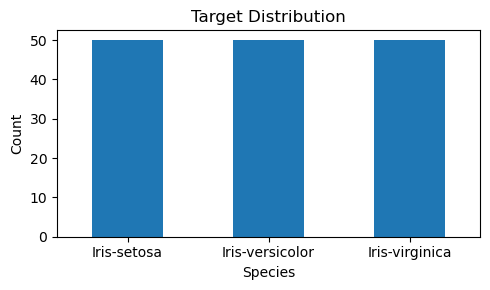

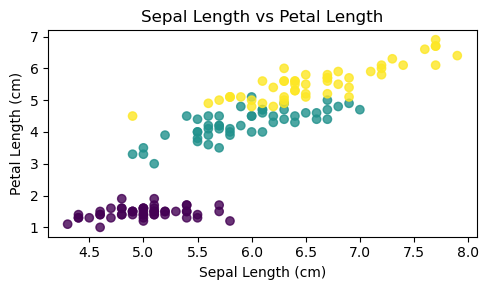

In [110]:
# -------- EDA --------
print("Shape:", df.shape, "\n")
print("Missing values:\n", df.isnull().sum(), "\n")
print("Target distribution:\n", df["Species"].value_counts(), "\n")

# -------- Plot 1: Target Distribution --------
plt.figure(figsize=(5, 3))
df["Species"].value_counts().plot(kind="bar")
plt.title("Target Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

print("\n")

# -------- Plot 2: Sepal vs Petal Length --------
plt.figure(figsize=(5, 3))
plt.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    c=df["Species"].astype("category").cat.codes,
    alpha=0.8
)
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()

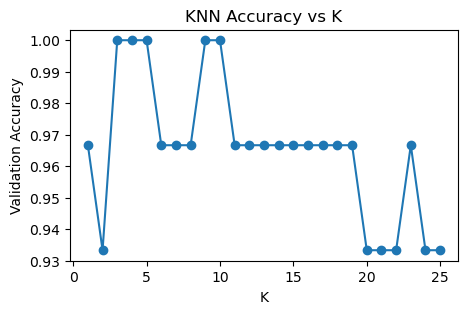

Best K: 3
Best Accuracy: 1.0


In [112]:
X = df.drop("Species", axis=1)
y = df["Species"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------- KNN: Accuracy vs K --------
k_values = range(1, 26)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

plt.figure(figsize=(5, 3))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("K")
plt.ylabel("Validation Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print("Best K:", best_k)
print("Best Accuracy:", max(accuracies))

In [116]:
# ================== Final KNN Model ==================
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# ================== Metrics ==================
print("\n--- KNN Metrics ---")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score (weighted):", f1_score(y_val, y_pred, average="weighted"))


--- KNN Metrics ---
Accuracy: 1.0
F1 Score (weighted): 1.0


In [ ]:
"""
Conclusion: 
1. The K-Nearest Neighbours classifier was successfully implemented on the Iris dataset.
2. By varying the value of K from 1 to 25, the effect of the bias–variance trade-off was observed.
3. Lower values of K resulted in higher variance, while higher values increased bias.
4. The optimal K was selected based on maximum validation accuracy.
5. The accuracy vs K plot clearly demonstrates how hyperparameter tuning improves model generalization.
"""